In [1]:
import csv
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
df = pd.read_csv("../../data/data7size10.csv")
y = df['class']

In [2]:
img_list = []
size = 64
for i in range(len(df)):
    img_list.append(cv2.resize(cv2.imread("../../"+df.PATH[i]),(size,size)))
    
X_train, X_test, y_train, y_test = train_test_split(img_list, y, test_size=0.2,random_state=1)
X_test,X_val,y_test,y_val = train_test_split(X_test, y_test, test_size=0.5,random_state=1)

In [3]:
np.save("X_train",np.array(X_train))
np.save("X_val",np.array(X_val))
np.save("X_test",np.array(X_test))
np.save("y_train",np.array(y_train))
np.save("y_val",np.array(y_val))
np.save("y_test",np.array(y_test))

In [3]:
from tensorflow.keras.utils import to_categorical
X_train,X_val,X_test = np.array(X_train)/255.,np.array(X_val)/255.,np.array(X_test)/255.
y_train,y_val,y_test =  to_categorical((np.array(y_train)),7),to_categorical((np.array(y_val)),7),to_categorical((np.array(y_test)),7)

In [5]:
from tensorflow.keras import layers,models,initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
import sys
def model_build():
    size = 64
    factor=1e-5
    model = models.Sequential()
    model.add(layers.Conv2D(16, (5, 5), activation='relu', kernel_regularizer=l1(factor),input_shape=(size, size, 3)))
    model.add(layers.MaxPooling2D((2, 2)))


    model.add(layers.Conv2D(32, (5, 5), activation='relu',kernel_regularizer=l1(factor)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=l1(factor)))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=l1(factor)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu',kernel_regularizer=l1(factor)))
    
    model.add(layers.Dense(7, activation='softmax'))
    #model.summary()
    return model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
model = model_build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 16)        1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)         

In [6]:
from tensorflow.python.keras.callbacks import TensorBoard
model = model_build()
model.compile(
   optimizer = 'adamax',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

#tsb = TensorBoard(log_dir='./logs')
history = model.fit(X_train, y_train,
          batch_size=128,
          epochs=20,
          validation_data=(X_val,y_val))

Epoch 1/20
473/473 [==============================] - 31s 64ms/step - loss: 1.4020 - accuracy: 0.4798 - val_loss: 1.1799 - val_accuracy: 0.5891
Epoch 2/20
473/473 [==============================] - 29s 61ms/step - loss: 1.1533 - accuracy: 0.6040 - val_loss: 1.1618 - val_accuracy: 0.5979
Epoch 3/20
473/473 [==============================] - 29s 62ms/step - loss: 1.1142 - accuracy: 0.6178 - val_loss: 1.1082 - val_accuracy: 0.6217
Epoch 4/20
473/473 [==============================] - 29s 61ms/step - loss: 1.0903 - accuracy: 0.6267 - val_loss: 1.1011 - val_accuracy: 0.6282
Epoch 5/20
473/473 [==============================] - 28s 60ms/step - loss: 1.0593 - accuracy: 0.6402 - val_loss: 1.0900 - val_accuracy: 0.6340
Epoch 6/20
473/473 [==============================] - 28s 60ms/step - loss: 1.0414 - accuracy: 0.6459 - val_loss: 1.0484 - val_accuracy: 0.6479
Epoch 7/20
473/473 [==============================] - 28s 60ms/step - loss: 1.0290 - accuracy: 0.6556 - val_loss: 1.0320 - val_accuracy:

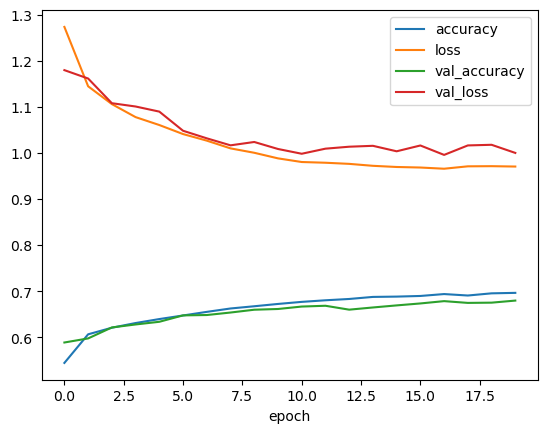

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history["accuracy"], label="accuracy")
plt.plot(history.epoch, history.history["loss"], label="loss")
plt.plot(history.epoch, history.history["val_accuracy"], label="val_accuracy")
plt.plot(history.epoch, history.history["val_loss"], label="val_loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

In [8]:
score = model.evaluate(X_test, y_test, verbose=0,batch_size=128)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0014735460281372
Test accuracy: 0.6912503242492676
